In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

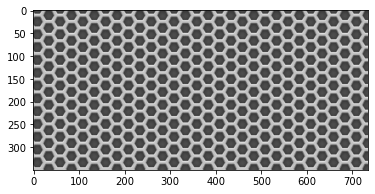

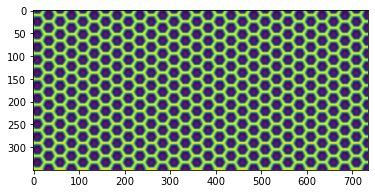

In [2]:
imagen = cv.imread('metalgrid.jpg')
gray = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(7,7),0)
plt.imshow(imagen)
plt.show()
plt.imshow(blur)
plt.show()

In [3]:
# Gradientes
#===========
# Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)
# De igual modo para Sobely
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)
# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)
# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

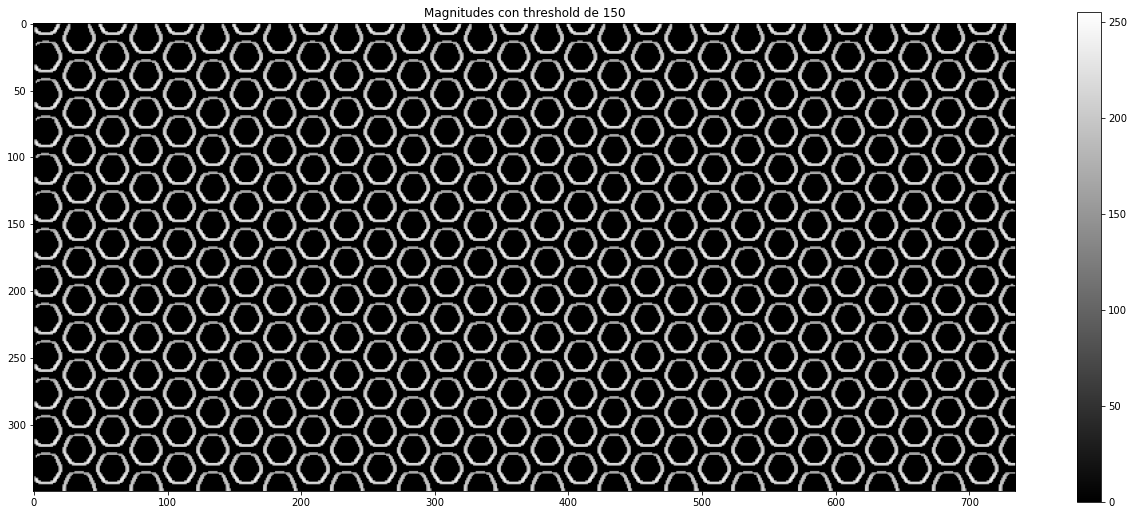

In [4]:
# Mostramos la imagen de magnitudes con un threshold determinado
mask = mag < 150
th_mag = mag
th_mag[mask] = 0
th_mag = np.uint8(th_mag)
plt.figure(figsize=(22, 9))
plt.imshow(th_mag, 'gray')
plt.title("Magnitudes con threshold de 150")
plt.colorbar()
plt.show()



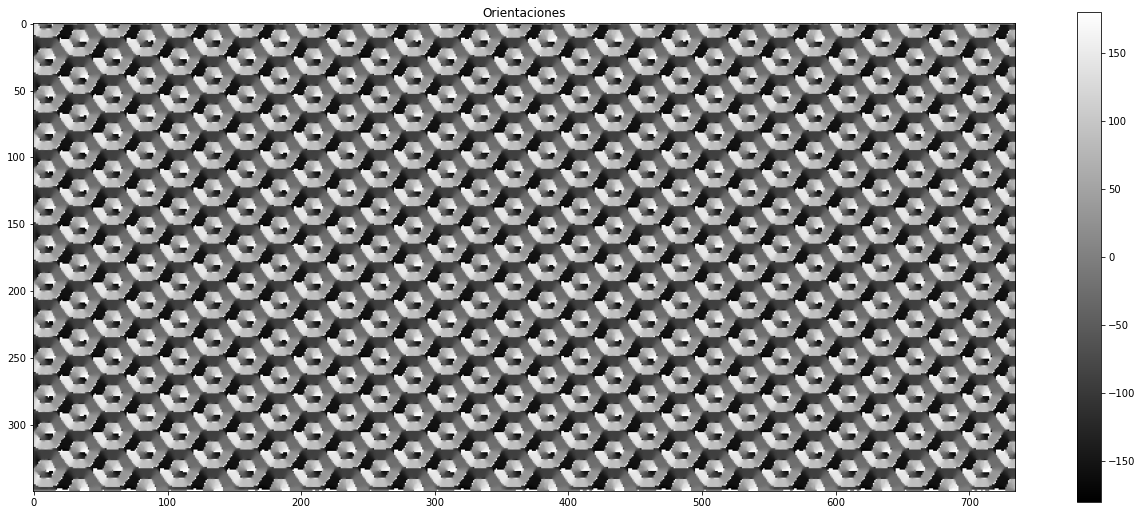

In [5]:
plt.figure(figsize=(22, 9))
plt.imshow(angle, 'gray')
plt.title("Orientaciones")
plt.colorbar()
plt.show()

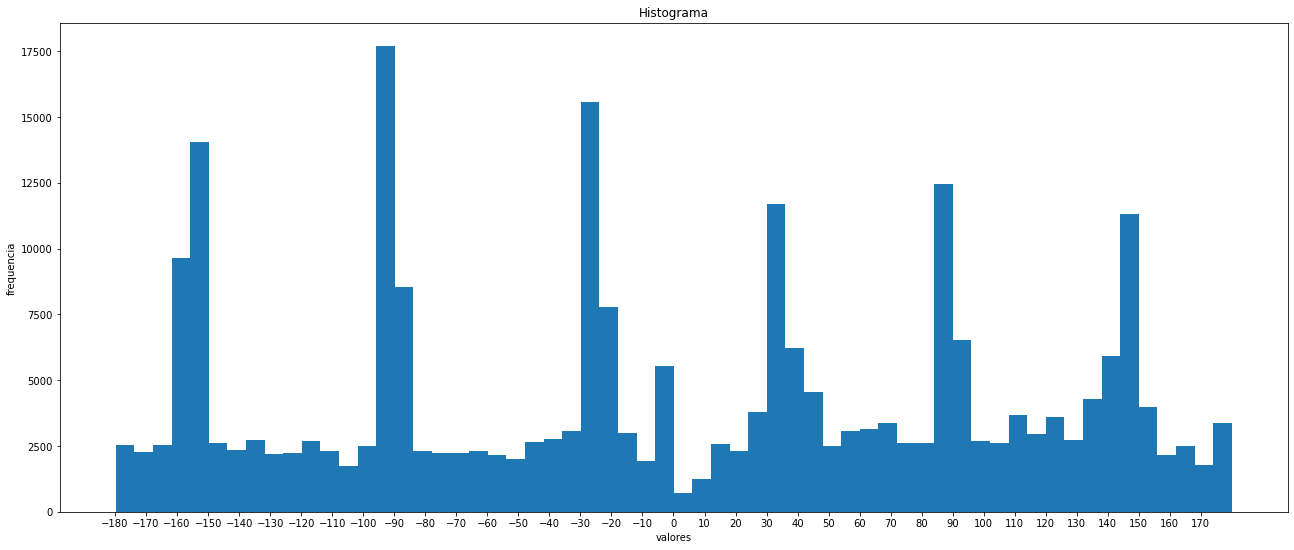

In [6]:
#HISTOGRAMA para ver que angulos filtrar
flatten_mag = th_mag.flatten()
flatten_ang = angle.flatten()
plt.figure(figsize=(22, 9))
cuenta, cajas, ignorar = plt.hist(flatten_ang, 60)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.xticks(range(-180, 180, 10))
plt.show()

In [7]:
def Grafica_Bordes(angulo_ini,angulo_itervalo=45.0, mag_threeshold = 100.0,color=(255,0,0)):
    angulo_fin = angulo_ini + angulo_itervalo 
    angle_mask = (angle >= angulo_ini) & (angle <= angulo_fin) 
    mag_mask = mag >= mag_threeshold
    mask = angle_mask & mag_mask
    img_salida = imagen.copy()
    img_salida[mask] = color

    plt.figure(figsize=(16,12))
    plt.imshow(img_salida)
    plt.title(f"Ángulos de {angulo_ini} a {angulo_fin} c/ umbral de magnitud {mag_threeshold}")
    plt.show()

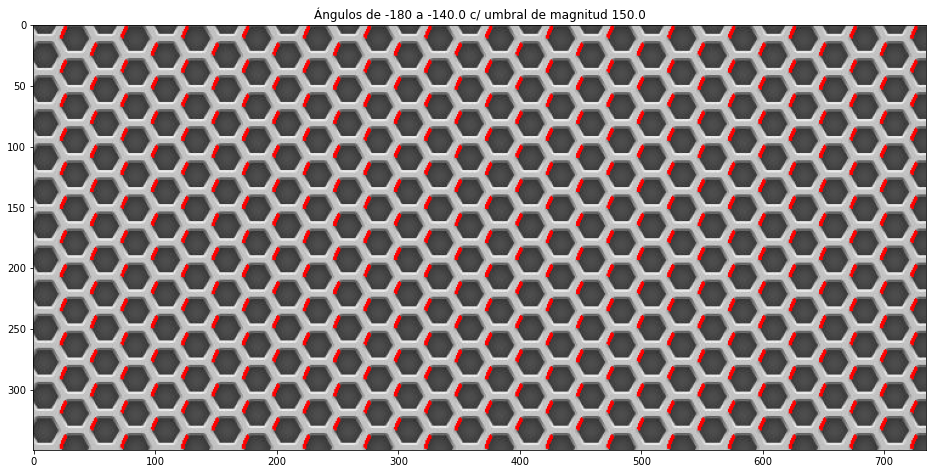

In [8]:
Grafica_Bordes(angulo_ini=-180,angulo_itervalo=40.0, mag_threeshold=150.0,color=(255,0,0))


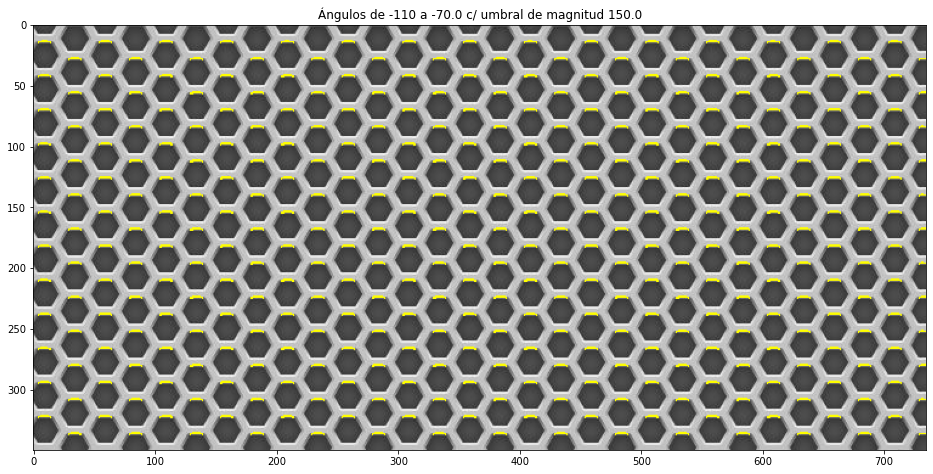

In [9]:
Grafica_Bordes(angulo_ini=-110,angulo_itervalo=40.0, mag_threeshold=150.0,color=(255,255,0))


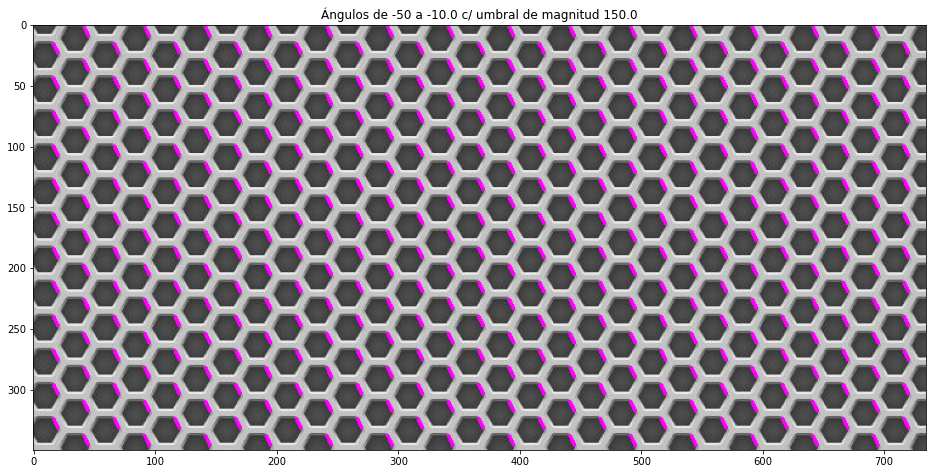

In [10]:
Grafica_Bordes(angulo_ini=-50,angulo_itervalo=40.0, mag_threeshold=150.0,color=(255,0,255))


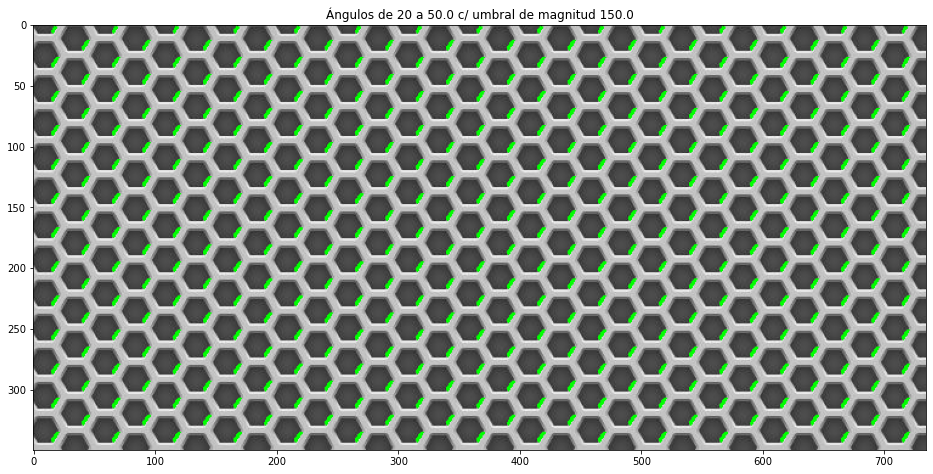

In [11]:
Grafica_Bordes(angulo_ini=20,angulo_itervalo=30.0, mag_threeshold=150.0,color=(0,255,0))


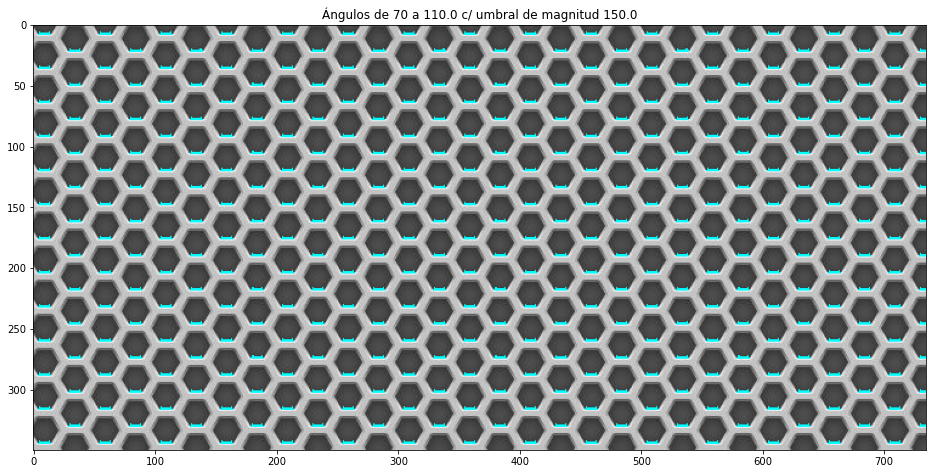

In [12]:
Grafica_Bordes(angulo_ini=70,angulo_itervalo=40.0, mag_threeshold=150.0,color=(0,255,255))


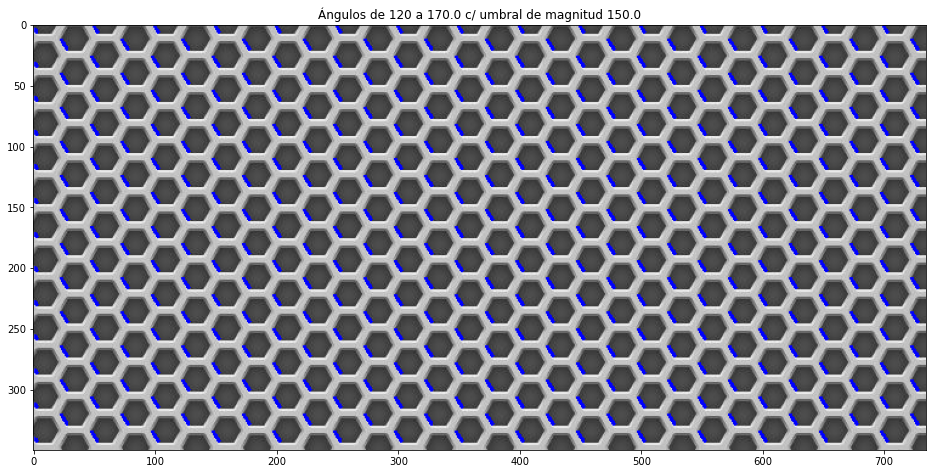

In [13]:
Grafica_Bordes(angulo_ini=120,angulo_itervalo=50.0, mag_threeshold=150.0,color=(0,0,255))